## Amiy.io Business Weekly Report 

This report will be included:
1. Genneral Sales performance last week
2. Customer segmentation by countries, executive level and working department
3. Answer and No-Answer customers with their identities. 


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#3 columns Executive level, Department and Country were added through Excel based filtering on Job title, phone number and City
q1 = pd.read_csv('/Users/huedinh/Desktop/AmiyQ1.csv', encoding='latin-1')
q1['Executive-level'].replace({'MANAGER':'Manager'}, inplace = True)
q1.head(2)

,index,Deal - Contact person,Person - Job Title,Executive-level,Department,Country,Person - Phone,Person - Lead Source,Deal - Organization,Organization - Company website,Deal - Stage,Person - Linkedin,Person - Email,Organization - Label,Person - Country,Person - Similarweb link,Organization - Time Zone,Unnamed: 17,Unnamed: 18
0,1,Virendra Raheja,Director of Technology,Director-up,IT,AUS,"6121130, +61 2 8870 7700, +61 2 98136784, +61 ...",NaN,Ai-Media,ai-media.tv,Lead in,https://www.linkedin.com/in/ACwAAAMg2isBX1IBM5...,virendra.raheja@ai-media.tv,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Sujit Nair,Information Technology Project Manager,Manager,IT,AUS,901.373.0200,NaN,ACMI - Australian Centre for the Moving Image,acmi.net.au,Lead in,https://www.linkedin.com/sales/people/ACwAACii...,sujit.nair@acmi.net.au,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Genneral Sales performance

In [3]:
#Number of Customers sales team approaching this week
approach = q1[q1['Deal - Stage'].isin(['Lead in', 'Linkedin connection request'])]
k = approach.groupby(['Deal - Stage'])['Deal - Stage'].count()
k

Deal - Stage
Lead in                        110
Linkedin connection request      8
Name: Deal - Stage, dtype: int64

In [4]:
#Grouping customer per Executive level
executive_level = q1.groupby(['Executive-level'])['Executive-level'].count()
executive_level = executive_level.to_frame()
executive_level = executive_level.rename(columns = {'Executive-level':'count'})
executive_level = executive_level.reset_index()
executive_level

,Executive-level,count
0,CO,72
1,Director-up,206
2,Manager,78
3,Officer,45


In [5]:
#Grouping customer per their working departments
dept = q1.groupby(['Department'])['Department'].count()
dept = dept.to_frame()
dept = dept.rename(columns = {'Department':'count'})
dept = dept.reset_index()
dept

,Department,count
0,General,87
1,HR,41
2,IT,129
3,Operations,32
4,S&M,112


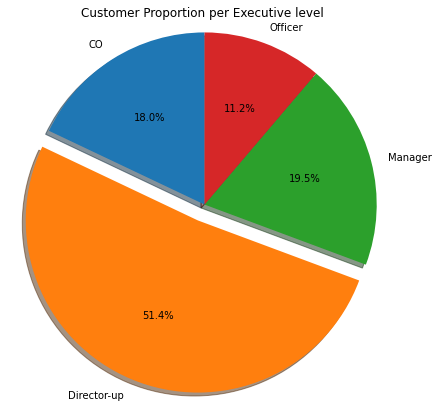

In [6]:
# Pie chart represents proportion of executive level of customers:
labels = executive_level['Executive-level']
sizes = executive_level['count']
explode = (0,0.1, 0, 0)  

fig1, ax1 = plt.subplots(figsize = (7, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Customer Proportion per Executive level')
ax1.axis('equal')  
plt.show()

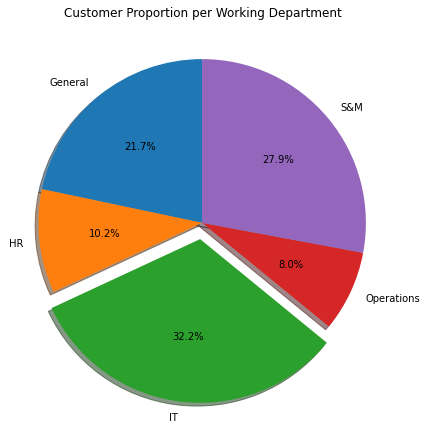

In [7]:
# Pie chart represents proportion of working department of customers:
labels1 = dept['Department']
sizes1 = dept['count']
explode1 = (0, 0, 0.1, 0, 0)  

fig1, ax1 = plt.subplots(figsize = (7, 7))
ax1.pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Customer Proportion per Working Department', y = 1.05)
plt.show()

In [8]:
#Couting the number of customers via deal-stage 
process = q1.groupby(['Deal - Stage'])['Deal - Stage'].count().sort_values(ascending=False)
process = process.to_frame()
process.rename(columns = {'Deal - Stage':'Count'}, inplace = True)
process

,Count
Deal - Stage,
call,148
Lead in,110
No answer,80
Not intrested,31
2nd call,16
Linkedin connection request,8
Email sent,4
No answer 2,2
Meeting set,1


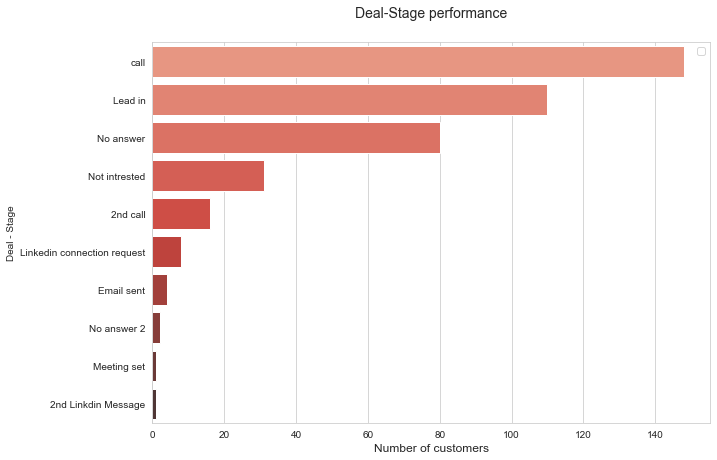

In [9]:
#Bar chart representing the distribution of customer in each deal-stage
sns.set_style('whitegrid')
colors = sns.color_palette('Reds_d', n_colors=len(process))
g = sns.barplot(data = process,x = 'Count', y = process.index,palette = colors)
g.figure.set_size_inches(10, 7)
g.set_xlabel('Number of customers', size = 12)
g.set_title('Deal-Stage performance', size = 14, y = 1.05)
plt.legend([])
plt.show()

Last week, sales team interacted with 401 customers, in that number the team approached 118 customers for the first time (Via Lead-in 110 and LinkedIn 8).

246 calls were made with no-answer rate is 33%

 1 meeting was set-up

The Landscape seniority level this week, 51.4%  are Directors and above, 18% are COs, those have the highest decision making power in the organisation. Remaining are managers and officers, those often give feed-back to influence decision makers.

From the specialised department perspective, 60% of our sales team customers this week came from the IT and Sales&Marketing departments. Remaining proportion belongs to HR, Operations and General management. 

### Customer Segmentation via countries

In [10]:
#Groupping customers per countries by deparments
dept_per_country = q1.groupby(['Country', 'Department'])['Department'].count()
dept_per_country = dept_per_country.to_frame()
dept_per_country.rename(columns = {'Department':'Number_of_customer'}, inplace = True)
dept_per_country = dept_per_country.reset_index()

#Add empties values for the purpose of  dataset validation for further visualisation
d = {'Country': ['AUS', 'NZ', 'NZ'], 'Department': ['S&M', 'HR','Operations'], 'Number_of_customer':[0,0,0]}
df = pd.DataFrame(data=d)
per_country = dept_per_country.append(df)
per_country


,Country,Department,Number_of_customer
0,AUS,General,21
1,AUS,HR,39
2,AUS,IT,102
3,AUS,Operations,1
4,NZ,General,4
5,NZ,IT,20
6,NZ,S&M,1
7,USA,General,62
8,USA,HR,2
9,USA,IT,7


In [11]:
#Create a pivot table for visualisation
per_country = per_country.pivot(index = 'Country', columns = 'Department', values = 'Number_of_customer')
per_country 

Department,General,HR,IT,Operations,S&M
Country,,,,,
AUS,21,39,102,1,0
NZ,4,0,20,0,1
USA,62,2,7,31,111


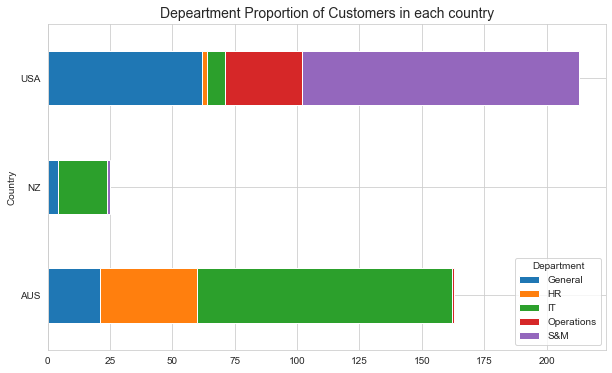

In [12]:
#Visualise customer from each countries and department they come from
sns.set_style('whitegrid')
per_country.plot.barh(stacked=True, figsize = (10,6))
plt.title('Depeartment Proportion of Customers in each country', size = 14)
plt.show()

In [13]:
#Groupping customers per country by their executive level
exe_per_country = q1.groupby(['Country', 'Executive-level'])['Executive-level'].count()
exe_per_country  = exe_per_country.to_frame()
exe_per_country.rename(columns = {'Executive-level':'Number_of_customer'}, inplace = True)
exe_per_country = exe_per_country.reset_index()
exe_per_country = exe_per_country.pivot(index = 'Country', columns = 'Executive-level', values = 'Number_of_customer')
exe_per_country

Executive-level,CO,Director-up,Manager,Officer
Country,,,,
AUS,34,42,57,30
NZ,10,5,9,1
USA,28,159,12,14


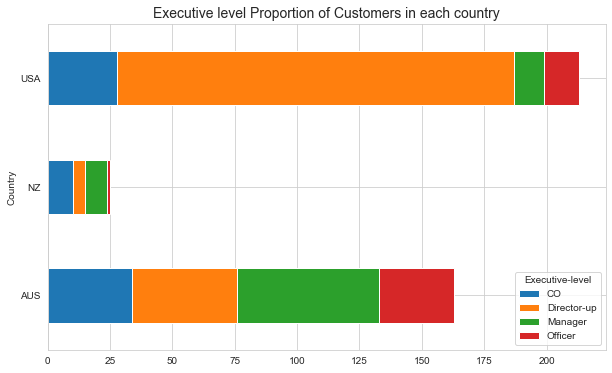

In [14]:
#Visualise customer per country and their executive level
exe_per_country.plot.barh(stacked=True, figsize = (10,6), title = 'Executive level Proportion of Customers in each country')
plt.title('Executive level Proportion of Customers in each country', size = 14)
plt.show()

In this week, Sales team communicate with customers come from : USA, New Zealand and Australia. Mainly  of them are from USA - 205 and Australia 167. 


Most IT people are from Australia and New Zealand while most Sales and Marketing(Business Development) people are from the USA. 

39 out of 41 people in Human Resource are from Australia.


From the senior level perspective, Director and above takes most of the American customers while the proportions are relatively equal between  levels in Australia and New Zealand.


### 3. Answer and No-Answer customers with their identities. 

In [15]:
#Slice the dataframe which contain only customers who get called
call = q1[q1['Deal - Stage'].isin(['call', '2nd call', 'No answer', 'No answer 2'])]

#Group by Department
call_dept = call.groupby(['Department'])['Department'].count()
call_dept = call_dept.to_frame()
call_dept = call_dept.rename(columns = {'Department':'count'})
call_dept = call_dept.reset_index()

#Group by executive level
call_executive = call.groupby(['Executive-level'])['Executive-level'].count()
call_executive = call_executive.to_frame()
call_executive = call_executive.rename(columns = {'Executive-level':'count'})
call_executive = call_executive.reset_index()



In [17]:
#Slice the data for No answer and No answer 2 customers by filtering 'Deal - Stage'
noanswer = q1[q1['Deal - Stage'].isin(['No answer', 'No answer 2'])]

#Transforming the dataframe for visualisation purpose
noanswer_dept = noanswer.groupby(['Department'])['Department'].count()
noanswer_dept = noanswer_dept.to_frame()
noanswer_dept = noanswer_dept.rename(columns = {'Department':'count'})
noanswer_dept = noanswer_dept.reset_index()

#Noanswered rate is the percentage of people in a type of department who got a call but did not answer. 
noanswer_dept = noanswer_dept.merge(call_dept, on = 'Department')
noanswer_dept['Noanswer_rate'] = noanswer_dept['count_x']*100/noanswer_dept['count_y']
noanswer_dept = noanswer_dept.set_index('Department')
noanswer_dept = noanswer_dept.drop(['count_y'], axis =1)
noanswer_dept.rename(columns = {'count_x': 'Number of No-answered customers'}, inplace = True)

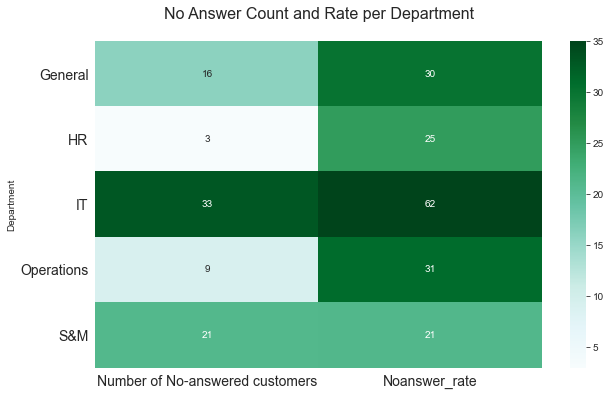

In [18]:

# Plotting the heat map which represents for Number of No answer customer and the no-answer rate  per Department
plt.title('No Answer Count and Rate per Department', size = 16, y = 1.05)

# Plot the heatmap
g = sns.heatmap(data=noanswer_dept, annot=True, cmap='BuGn', vmax = 35)
g.figure.set_size_inches(10, 6)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

In [19]:
#No Answer per executive level
noanswer_level = noanswer.groupby(['Executive-level'])['Executive-level'].count()
noanswer_level = noanswer_level.to_frame()
noanswer_level = noanswer_level.rename(columns = {'Executive-level':'count'})
noanswer_level = noanswer_level.reset_index()

#Answered rate is the percentage of people in a type of department who got a call AND answered. 
noanswer_level = noanswer_level.merge(call_executive, on = 'Executive-level')
noanswer_level['Noanswer_rate'] = noanswer_level['count_x']*100/noanswer_level['count_y']
noanswer_level = noanswer_level.set_index('Executive-level')
noanswer_level = noanswer_level.drop(['count_y'], axis =1)
noanswer_level.rename(columns ={'count_x':'Number of No-answered customers'}, inplace = True)

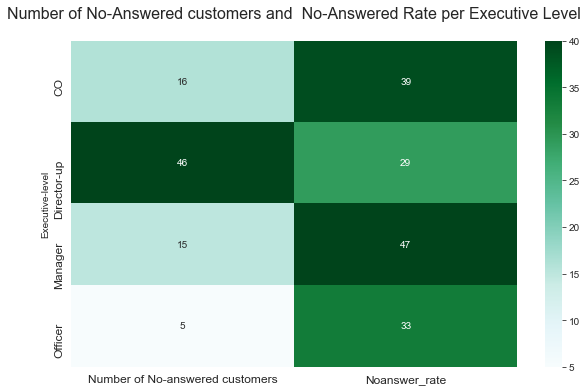

In [21]:

# Plotting the heat map which represents for Number of No answer customer and the no-answer rate  per Executive level
plt.title('Number of No-Answered customers and  No-Answered Rate per Executive Level', size = 16, y = 1.05)

# Plot the heatmap
g = sns.heatmap(data=noanswer_level, annot=True, cmap='BuGn', vmax = 40)
g.figure.set_size_inches(10, 6)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.show()

In [23]:
#Slice the dataframe for do-anwer customers by filtering for ['call', '2nd call']
do_answer = q1[q1['Deal - Stage'].isin(['call', '2nd call'])]

#Dataframe transformation for visualisation purpose (Answered per Department)
answer_dept = do_answer.groupby(['Department'])['Department'].count()
answer_dept = answer_dept.to_frame()
answer_dept = answer_dept.rename(columns = {'Department':'count'})
answer_dept = answer_dept.reset_index()

#Noanswered rate is the percentage of people at a level of executive who got a call but did not answer. 
answer_dept = answer_dept.merge(call_dept, on = 'Department')
answer_dept['answer_rate'] = answer_dept['count_x']*100/answer_dept['count_y']
answer_dept = answer_dept.set_index('Department')
answer_dept = answer_dept.drop(['count_y'], axis =1)
answer_dept.rename(columns = {'count_x':'Number of answered customers'}, inplace = True)

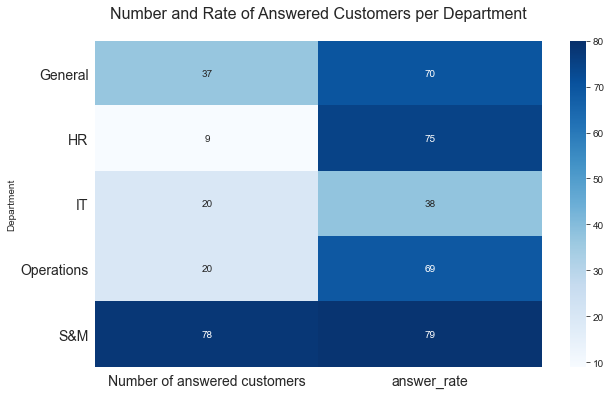

In [25]:
# Plotting the heat map which represents for Number of answered customer and the no-answer rate  per Department
plt.title('Number and Rate of Answered Customers per Department', size = 16, y = 1.05)

# Plot the heatmap
g = sns.heatmap(data=answer_dept, annot=True, cmap='Blues', vmax =80)
g.figure.set_size_inches(10, 6)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

In [26]:
#Dataframe transformation for visualisation purpose (Answered per Executive lelel)
answer_level = do_answer.groupby(['Executive-level'])['Executive-level'].count()
answer_level  = answer_level.to_frame()
answer_level  = answer_level.rename(columns = {'Executive-level':'count'})
answer_level  = answer_level.reset_index()

#Answered rate is the percentage of people at a level of executive who got a call and answered 

answer_level  = answer_level.merge(call_executive, on = 'Executive-level')
answer_level ['answer_rate'] = answer_level['count_x']*100/answer_level['count_y']
answer_level  = answer_level.set_index('Executive-level')
answer_level  = answer_level.drop(['count_y'], axis =1)
answer_level.rename({'count_x':'Number of answered customers'}, inplace = True)

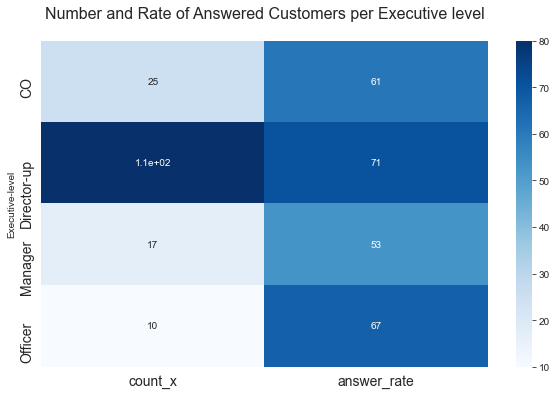

In [28]:
#Plotting the heat map which represents for Number of answered customer and the no-answer rate  per Executive level
plt.title('Number and Rate of Answered Customers per Executive level', size = 16, y = 1.05)

# Plot the heatmap
g = sns.heatmap(data=answer_level, annot=True, cmap='Blues', vmax = 80)
g.figure.set_size_inches(10, 6)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

#### Answer possibility per Departments and Seniority Levels


Calling takes 61,5% of the team's conversations with client. It's extremely important to sales efficiency as the initial impression from a customer comes from here.

However, every 3 calls, one did not reach the customer. This rate is very high while the cost for leads generating is not cheap, in other words, 33% of the cost on generating leads did not work right at the first step. 

Tables beside represent for No-Answered and Answered in both number and rate over departments and seniority level. 

IT people have extremely low pick-up phone rate and high no-pick-up phone rate, those factors support each other that might determine IT people normally do not like to answer their phones. Moreover, when most of them are from Australia, so did our team choose the appropriate times to call them? If we did call them in appropriate moments, then we might need to find an alternatively effectivel communication method. 

In contrast, when calling clients from Sales and Marketing department (mainly in the US), there is a significant high possibility to get in touch with them, similarly with people from general management. . 

The answering-phone behaviour does not seem to be strongly effected by the seniority level.

(The hypothesis of this analysis: The landscape of of clients, and call/number-of-total-conversations ratio are represented for our sample of client population) 